# Project Scope

With COVID-19 drastically changing the daily lives of city dwellers, we are banking on an increased interest in bikes as transportation.  While not everyone is able to or interested in owning their own, we believe a bikeshare model will provide service for citizens, as well as a stable business opportunity for our company.  

### How many bikes will ne needed?

We want to ensure we have enough bicycles available at any given time.  We need to account for seasonal interest, assuming growth in nicer weather and shirnkage during colder months.


Too few, and we risk turning off customers by lack of availability when they are sought

Too many, and we run the chance of not recouping expenses from initial costs, maintenance, staffing...etc

### The variables in question.

Looking at two years of DC metro bike share, we have identified some very helpful variables to reach our goals

* Temperature and Ambient temperature ('temp','atemp')
    * A large signifier of interest in riding, especially for the casual rider
* Casual and Registered ridersghip ('casual','registered')
    * Casual riders are those who can be thought of as the tourist or leisurely rider.  This numbers can be expected to rise with nicer (warmer) temperatures
    * Registered riders are those who are likely commuters, who will likely be riding in unfavorable conditions as much as favorable conditions

In [1]:
""" 
Master list of imports
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

LineR = LinearRegression()

In [9]:
df_dirty = pd.read_csv(r"C:\Users\marce\Documents\Graduate School\Data 602\Linear Regression HW\Bike\Bikeshare.csv")
df = df_dirty.dropna()
df = df[['temp', 'atemp' ,'hum','windspeed','casual','registered','cnt']]

df.describe()

,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [3]:
X_train, X_test = train_test_split(df, test_size = 0.2)

print("Training Data Shape:" ,X_train.shape,"Testing Data Shape:", X_test.shape)

Training Data Shape: (584, 7) Testing Data Shape: (146, 7)


# This is the modeling framework for each set of feaures.  

* Variables and Arguments needed:
    * train : the training set
    * test : the test set
    * feat : the features used in training
    * y_feat : the feature we are trying to predict

In [4]:
"""
train: the training set
test: the test set
feat: features must be in brackets ['feat1','feat2', ...etc]
"""

def LR_fit(train, test, feat):
        
    LineR.fit(train[feat] , train.cnt)
    print("Intercept::", LineR.intercept_, "Coefficient", LineR.coef_)
    r_square = LineR.score(train[feat], train.cnt)
    print("R-squared value: ", r_square)
    
    X = train[feat]
    y = train.cnt
    X = sm.add_constant(X)
    mod = sm.OLS(y, X, hasconst= True)
    res = mod.fit()
    print(res.summary())
    
    Xtest = test[feat]
    ytest = test.cnt
    Xtest = sm.add_constant(Xtest)
    y_predict = res.predict(Xtest)
    
    print("Predicted y values", y_predict)    
    residuals = res.resid

    y_pred = res.predict(X)
    plt.scatter(y_pred, residuals)
    plt.axhline(y=0, color='red', label='0')
    plt.xlabel('predicted values')
    plt.ylabel('residuals')
    plt.tight_layout()
    
    X_test['Predicted'] = y_predict
    
    print(X_test[['Predicted','cnt']])
    

## Regression temp/atemp

Intercept:: 1014.2008704148157 Coefficient [56.48640143 98.44301748]
R-squared value:  0.4007277318209975
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.401
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     194.3
Date:                Tue, 22 Sep 2020   Prob (F-statistic):           2.51e-65
Time:                        13:16:44   Log-Likelihood:                -5107.9
No. Observations:                 584   AIC:                         1.022e+04
Df Residuals:                     581   BIC:                         1.023e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------

C:\Users\marce\anaconda3\lib\site-packages\ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


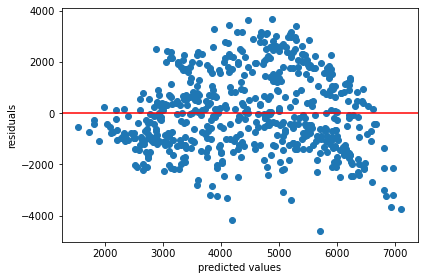

In [5]:
LR_fit(X_train, X_test, ['temp','atemp'])

## Regression casual riders

Intercept:: 2838.545958925083 Coefficient [1.92658987]
R-squared value:  0.4632111676466727
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.463
Model:                            OLS   Adj. R-squared:                  0.462
Method:                 Least Squares   F-statistic:                     502.2
Date:                Tue, 22 Sep 2020   Prob (F-statistic):           1.14e-80
Time:                        13:16:44   Log-Likelihood:                -5075.8
No. Observations:                 584   AIC:                         1.016e+04
Df Residuals:                     582   BIC:                         1.016e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

C:\Users\marce\anaconda3\lib\site-packages\ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


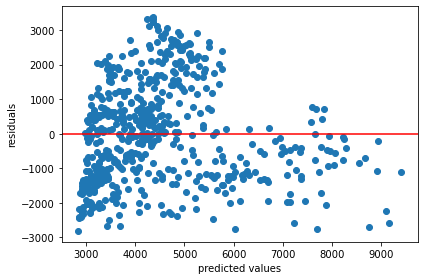

In [6]:
LR_fit(X_train, X_test, ['casual'])

## Regression registered riders

Intercept:: 195.93793072707012 Coefficient [1.17957512]
R-squared value:  0.895969162208459
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     5012.
Date:                Tue, 22 Sep 2020   Prob (F-statistic):          3.45e-288
Time:                        13:16:45   Log-Likelihood:                -4596.6
No. Observations:                 584   AIC:                             9197.
Df Residuals:                     582   BIC:                             9206.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

C:\Users\marce\anaconda3\lib\site-packages\ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


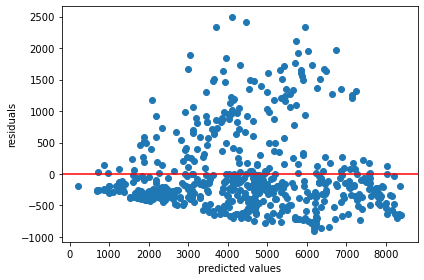

In [7]:
LR_fit(X_train, X_test, ['registered'])

## Combined regression (temp, atemp, casual, registered

Intercept:: -273.86171232861125 Coefficient [19.51402804 20.34830133  1.06931396]
R-squared value:  0.9140047236138248
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     2055.
Date:                Tue, 22 Sep 2020   Prob (F-statistic):          1.83e-308
Time:                        13:16:45   Log-Likelihood:                -4541.0
No. Observations:                 584   AIC:                             9090.
Df Residuals:                     580   BIC:                             9108.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------

C:\Users\marce\anaconda3\lib\site-packages\ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


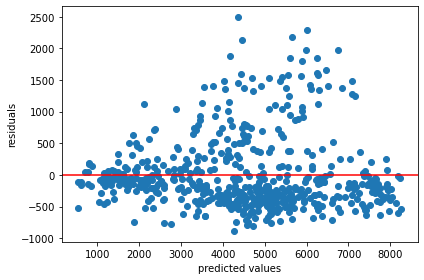

In [8]:
LR_fit(X_train, X_test, ['atemp','temp','registered'])

# Findings

 ### While temperature/ambient temperature was where we had hoped to find the best indicator, it appears daily registerd users are by far the strongest predictor.  